#Proyecto 1
- Deiner Rivera Soto
-Julian Olaya
-Weimar Andres Arenas Gonzalez

In [ ]:
#libreria para manejo de NDARRAY
import numpy as np;
import cmath
import math
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import spacy
import pandas as pd
#Librerpia para prueba de hiótesis.
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Se importa la información desde el Drive.
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1) Primeramente se cargan los datos de un paciente, en este caso los del paciente control C001R_EP_reposo, para ver las dimensiones y caracteristicas de los datos,y posteriormente se crea la función que recibirá los datos del paciente, para luego calcular la densidad de potencia para cada canal.

the loaded keys are: dict_keys(['__header__', '__version__', '__globals__', 'data'])
Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 180)
Numero de dimensiones: 3
Tamanio: 2880000
Tamanio en memoria (bytes): 23040000
Canal 1
Xn: [0.25514867 0.23170183 0.20648508 ... 0.15884532 0.13746053 0.11857206]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [-0.02041189 -0.01853557 -0.01651677 ... -0.01270606 -0.0109965
 -0.00948576]
sk: [0.1381544829829697, 0.3180272581141093, 0.1905949984518796, 0.15250109476796064, 0.44469916310984575, 0.04803615799876462, 0.26604104871864487, 0.11141270334878038, 0.2750744788877579, 0.02151574374390137, 0.5047751900642611, 0.7906582396588526, 0.24743945771161568, 0.062398170107607974, 0.1107580307178548, 0.20511197643906323, 0.0005153414103153231, 0.2541789798379118, 0.4063386188755632, 0.1744058196183059, 0.2894061917572112, 0.011045703245907

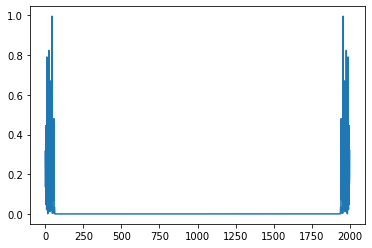

Canal 2
Xn: [0.12255237 0.09639466 0.07020237 ... 0.27243427 0.25620495 0.24014294]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [-0.00980419 -0.00771133 -0.0056155  ... -0.02179205 -0.02049576
 -0.01921143]
sk: [0.9431465184871237, 1.1079850818208434, 0.49175104603434366, 0.03232067539933015, 0.1502429597709711, 0.22927234280763858, 0.741241889428875, 0.5096216632882852, 0.32110519331116305, 0.01920525681516524, 0.6233073917187106, 0.8271290832886684, 0.2658425573493522, 0.05055884074788763, 0.07194932440605649, 0.11226701079487833, 0.009297682555739116, 0.01888898599492497, 0.14874458027547327, 0.11588827556779537, 0.21324202315633534, 0.05303538305138719, 0.060010663880066144, 0.32413509656623857, 0.19453567659670498, 0.0025272516911418507, 0.022275948134868582, 0.07296394714878829, 0.21740704374014125, 0.1547330945903177, 0.01409675296337177, 0.009211819981997845, 0.20938016045950653, 0.21470435944453178, 0.08723527689676458, 0.39860

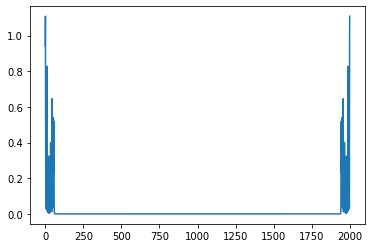

Canal 3
Xn: [-0.03139156 -0.05945515 -0.08580818 ...  0.27755379  0.26442361
  0.24940633]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [ 0.00251132  0.00475627  0.00686381 ... -0.02220156 -0.02115324
 -0.01995251]
sk: [1.4092945995180897, 1.0277764841001717, 0.18980590699590041, 0.37129555805706604, 0.24873630501340438, 0.0626252107939166, 0.8483457370011235, 1.0476366716494674, 0.5184572943850305, 0.14224593718747167, 0.5261776657213663, 0.5158773628458735, 0.1614031939881376, 0.04324126250693022, 0.06134067449581189, 0.2618816714320231, 0.11995139582251566, 0.06564064302099937, 0.007280713899559638, 0.17092104864518323, 0.2099405109605588, 0.09834834313407964, 0.12098518034810228, 0.09861503749957927, 0.09281499572587681, 0.008441757437093947, 0.14663202063069444, 0.14139485697865287, 0.08763964527624342, 0.039632001883411774, 0.1267723431259467, 0.016170186021424355, 0.16020081771225608, 0.26027517819593976, 0.18894356043175592, 0.05

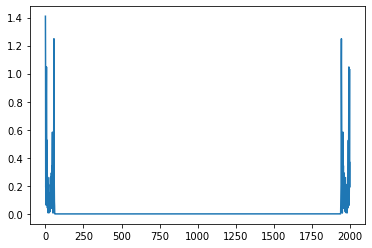

Canal 4
Xn: [-0.1178022  -0.09356408 -0.06703875 ... -0.12801335 -0.1394922
 -0.15089164]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [0.00942418 0.0074849  0.00536244 ... 0.0102398  0.01115903 0.01207133]
sk: [1.9483594497308232, 1.7345215949158195, 0.6085206081723171, 0.03528578586419075, 0.08768643746324788, 0.058233807691094895, 0.6737455782480396, 0.9208869620407695, 0.30667399039938803, 0.186590492187087, 0.6089563172043674, 0.3556157995142761, 0.05025628086306001, 0.01463800790253322, 0.028547678192410792, 0.13875312224225403, 0.023092551936714844, 0.1810390663883741, 0.3949717382120473, 0.545440012393443, 0.31012755815149157, 0.03326789934018665, 0.04907319274258062, 0.03165569184880942, 0.028332194081209103, 0.013346181183924543, 0.20444529749564977, 0.1613193080932992, 0.019363908229549764, 0.2013887969117925, 0.43627935792131023, 0.09990471101341389, 0.13261374251164643, 0.05914225134478387, 0.150266134819873, 0.0723953799249

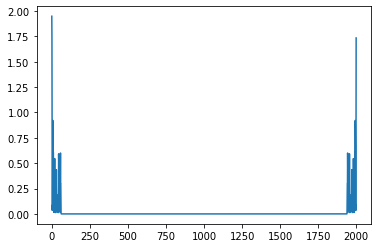

Canal 5
Xn: [-0.28291262 -0.23578183 -0.18544598 ... -0.33074286 -0.34455126
 -0.35742523]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [0.02263301 0.01886196 0.01483385 ... 0.02645616 0.02756325 0.02859402]
sk: [0.9394849210994632, 0.8966896560251955, 2.2147901589701533, 4.6806357010575175, 5.146092801064556, 1.6745606368943053, 0.4081811280204416, 0.31973882157765504, 0.11788626187482468, 0.09729317797931034, 0.4799206773271616, 0.250466908431161, 0.016211808740930582, 0.046524465264673236, 0.3926229491453844, 0.29183340056348406, 0.0021204288042770644, 0.39827814935902844, 0.8465195807441722, 0.7026939079683558, 0.4311441736159568, 0.1239509352273726, 0.06934812513014892, 0.2977264253767873, 0.1400102709325922, 0.1909697030886207, 0.45921110916588304, 0.49998309314637385, 0.18485520307853584, 0.29131327997571616, 0.3285403759000417, 0.02960420596203014, 0.1668601122772862, 0.16817020475823258, 0.017241505583878117, 0.07240445789571805

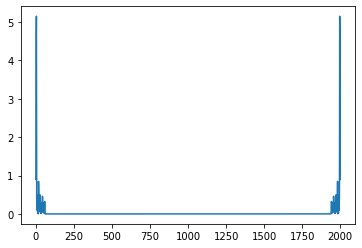

Canal 6
Xn: [0.50845682 0.50164468 0.49004744 ... 0.14230981 0.1873995  0.2315563 ]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [-0.04067655 -0.04013034 -0.03919895 ... -0.01138338 -0.0149915
 -0.0185245 ]
sk: [1.3971532696460094, 1.778507880209187, 1.2531058754354945, 0.7241239304710289, 0.48323645129442466, 0.18056361341185653, 0.05626039888680432, 0.6641649534619122, 0.9338069001583066, 0.09241799816487388, 0.5017995765791194, 0.37026378734821097, 0.014168776361507854, 0.33079138643356665, 1.0489652251298733, 1.2265506338102712, 0.49899642774041425, 0.21765245357924803, 0.27546655460012653, 0.5858427234319752, 0.3204170058060041, 0.04172659122307014, 0.030906304989472992, 0.12462813849558103, 0.08544342846249879, 0.06110161006415622, 0.2411434631704019, 0.1181892190726164, 0.1309682600346131, 0.3118915059009526, 0.16731742462164167, 0.047028635522981733, 0.7968304925835007, 0.49792557852448927, 0.08792772356462958, 0.3481483597229409

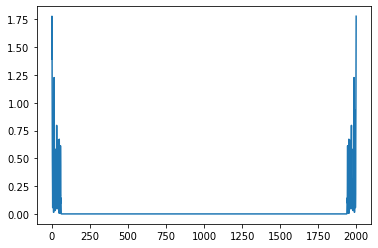

Canal 7
Xn: [0.37464725 0.39599199 0.41408428 ... 0.22831261 0.27297955 0.31544158]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [-0.02997178 -0.03167838 -0.03312265 ... -0.01826275 -0.02183769
 -0.02523533]
sk: [0.8709065430842121, 1.2527996436612863, 0.9071903378317192, 0.8634692602891354, 0.626792072017104, 0.20931073999935015, 0.040478709200716535, 0.8764093335121522, 1.0311055839574095, 0.07539146828677719, 0.30100647967446914, 0.25653552204677754, 0.17534128690906536, 0.3979024030562491, 0.5427384999663094, 0.6169524613811215, 0.3212094033491549, 0.08119474339988945, 0.28896976024022253, 0.5687974647160929, 0.1182631030159042, 0.2568173162767816, 0.42707560551990814, 0.20660001285260113, 0.08310040053882732, 0.057203857008969856, 0.2687152801791945, 0.24695247551942387, 0.006647715756527222, 0.07656178578672083, 0.08423515950112134, 0.0708030855418145, 0.6748461073120644, 0.5230514361366586, 0.018449028525709083, 0.2794485827286763

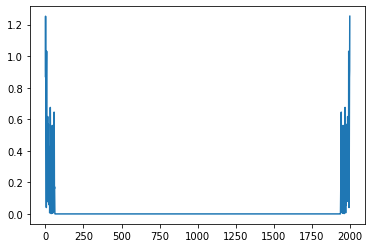

Canal 8
Xn: [-0.07763539 -0.01967225  0.03892722 ...  0.41638301  0.46737889
  0.51568663]
wn: [-0.08       -0.07999753 -0.07999012 ... -0.07999012 -0.07999753
 -0.08      ]
kn(Xn*wn): [ 0.00621083  0.00157373 -0.00311379 ... -0.03330653 -0.03738916
 -0.04125493]
sk: [0.8770321708132783, 1.2482191941063792, 0.8287834231242377, 0.4892182692432231, 0.27847860576390476, 0.2552875415554104, 0.16838920058766005, 0.7201753193661302, 1.2674771801868165, 0.21866057376218434, 0.011852900145558768, 0.0756537964646901, 0.36736795755324, 0.2363214257447759, 0.09112636496604627, 0.17860234773568046, 0.11666398736210563, 0.05386120000127273, 0.32289421541491975, 0.38168923779906017, 0.014944332039906177, 0.018187054808630136, 0.22292824569474576, 0.02928890579947637, 0.12171180619260723, 0.1388265261013303, 0.24949279896684862, 0.4569565280223865, 0.14830401018777328, 0.01641756484903639, 0.06310456681510314, 0.9613444548350688, 1.5138028816153184, 0.5340673872323194, 0.014383717196259973, 0.4023918

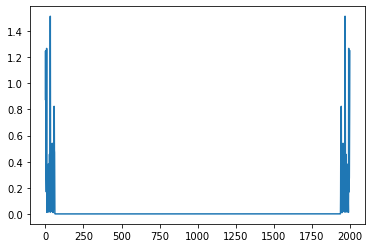

In [ ]:
#PRIMERA PARTE CARGA Y MANIPULACION BASICA
#library to load mat files
import scipy.io as sio;
#loading data
mat_contents = sio.loadmat('/content/drive/MyDrive/Bioseñales/PRACTICA3/control/C001R_EP_reposo.mat');
#the data is loaded as a Python dictionary: llaves y valores key:value
print("the loaded keys are: " + str(mat_contents.keys()));
#in the current case the signal is stored in the data field
data = mat_contents['data'];
print("Variable python: " + str(type(data)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data.dtype));
print("Dimensiones de los datos cargados: " + str(data.shape));
print("Numero de dimensiones: " + str(data.ndim));
print("Tamanio: " + str(data.size));
print("Tamanio en memoria (bytes): " + str(data.nbytes));

# Se definen los calculos para calcular el sk de la fórmula.
# Una variable N igual al número de datos de cada paciente.
N=2000;
# Un vector n de dimensiones 1 x n= 0,1,2,...,N-1.
n=np.arange(2000);
# Un vector K de las mismas dimensiones de n.
k=np.arange(2000);
# Se define un sk inicialmente en 0 y por los 2000 datos que se van a calcular a medida que sk va tomando valores de cada K.
sk=[0] * 2000;
# Formula para calcular el wn.
wn=0.42-0.5*np.cos((2*np.pi*n)/(N-1));
# Se crea la función para la densidad espectral de potencia.
# Se calcula el promedio de las épocas del paciente.
prom_epocas = np.mean(data, axis=2);
Xn=prom_epocas;
# Se crea la función para la densidad espectral de potencia.
def densidad_esp_pot(data):
  canal=1;
# Se implementa el for que va ha recorrer cada época en el promedio de las mismas.
  for Xn in prom_epocas:
    kn=Xn*wn;
    for i in k:
      # Fórmula del sk.
      # SK para cada i desde 0 hasta N-1.
      sk[i]=(1/N)*abs(((sum((kn)*np.exp((-1j*2*np.pi*n*i)/N))))**2)
    # Se imprimen los sk para cada canal con su densidad de potencia.
    # Se crea un contador canal=1 para que vaya recorriendo cada canal.
    print("Canal "+str(canal))
    print("Xn: "+str(Xn))
    print("wn: "+str(wn))
    print("kn(Xn*wn): "+str(kn))
    print("sk: "+str(sk))
    print("Londitud del sk: "+str(len(sk)))
    # Recorre cada canal desde 1 hasta 8.
    canal=canal+1
    plt.plot(sk)
    plt.show()
densidad_esp_pot(data);

2) Una vez calculada y obtenida la densidad espectral de potencia, se crea otra función que reciba la señal EEG de múltiples épocas, un canal, y devolver la densidad espectral de potencia para el rango de 13 a 30 Hz, de todas las diferentes épocas de la señal de análisis.

In [ ]:
#Se crea la función del PDS para el paciente control C001_EP_reposo.
def PSD_control(data):
# Se calcula el promedio de las epocas.
# También se crea el arreglo unidimensional que contiene el promedio de cada época para un solo canal.
  prom_epocas=np.mean(data, axis=1);
# Se crean las variaables y calculos de la formula de la densidad espectral de potencia.
  Xn=prom_epocas;
  kn=Xn*wn;
  for i in k:
    sk[i]=(1/N)*abs(((sum((kn)*np.exp(-1j*2*np.pi*n*i/N))))**2);
  # Como el rango de Frec es de 13 a 30 Hz, en el vector resultante sk, hay una frecuencia de 0.5Hz
  # por lo tanto, se suman los datos en el rango de 25 a 60.
  sk_rang_frec=sk[25:60];
  PSD_control=sum(sk_rang_frec);
  return PSD_control
data = mat_contents['data'];
# Se toma solamente el primer canal, todos los datos, y todas las épocas.
data=data[0,:,:];
PSD_control_C001_EP_reposo=PSD_control(data);
print('PSD_control_C001_EP_reposo: '+str(PSD_control_C001_EP_reposo))

PSD_control_C001_EP_reposo: 6.706599032849219


3) Ahora que ya se calculó el PSD para un canal del paciente control, se procede a calcular el PSD para cada canal.

In [ ]:
def PSD_canales (data):
  prom_epocas=np.mean(data, axis=2);
  Xn=prom_epocas;
  PSD_control=[];
  for Xn in prom_epocas:
    for i in k:
      sk[i]=(1/N)*abs(((sum((Xn*wn)*np.exp((-1j*2*np.pi*n*i)/N))))**2)
    sk_rang=sk[25:60]
    PSD_control.append(sum(sk_rang));
  return PSD_control
data = mat_contents['data'];
PSD_control=PSD_canales(data)
print(PSD_control)

[6.706599032849219, 7.1728013362881455, 8.496531115646844, 6.355849632989648, 6.502472357782398, 8.855175560722694, 7.31877693746718, 11.508650626608757]


Una vez optenidos el PSD para cada canal del paciente control, se realiza el mismo procedimiento para todos los pacientes control y parkinson para cada canal.

In [ ]:
import os
Carpeta_archivos=('/content/drive/MyDrive/Bioseñales/PRACTICA3/control/');
lista_archivos= os.listdir(Carpeta_archivos);
# Se importan y alamcenan los datos de control en una matriz.
# Se crea la matriz vacía para almacenar los datos
datos_control=[];  #El número de columnas de esta matriz va ser el número de columnas de los datos.
for archivos in lista_archivos:
  if archivos.endswith('.mat'):   # Se verifica que el archivo sea del tipo .mat
      mat_contents= sio.loadmat(os.path.join(Carpeta_archivos,archivos));
      data=mat_contents['data'];
      # Se insertan los datos a la matriz datos_control.
      datos_control.append(data);

# Se importan y alamcenan los datos de parkinson en otra matriz.
Carpeta_archivos=('/content/drive/MyDrive/Bioseñales/PRACTICA3/parkinson/');
lista_archivos = os.listdir(Carpeta_archivos);
datos_parkinson=[];
for archivos in lista_archivos:
    # Se verifica que el archivo sea de tipo .mat
    if archivos.endswith('.mat'):
        # Se cargan los datos del archivo
        mat_contents = sio.loadmat(os.path.join(Carpeta_archivos, archivos));
        data = mat_contents['data'];
        # Se insertan los datos a la matriz datos_parkinson.
        datos_parkinson.append(data);


4) Se crea una rutina que aplique sobre todos los archivos de la base de datos del punto 3 donde se tienen los PSD para cada canal de cada paciente control y parkinson. Después se almacenan estos datos en un DataFrame donde se identifica si el paciente es de control o parkinson con su promedio de densidad espectral de potencia para cada canal.

In [ ]:
# Se crean dos listas vacías para almacenar los resultados de la PSD para los datos de control y parkinson
PSD_control=[];
PSD_parkinson=[];
PSD=[];
# Se recorre cada señal en los datos de control
for senal in datos_control:
  # Se calcula la PSD de la señal para cada canal usando una función llamada "PSD_canales"
  PSD_1=PSD_canales(senal);
  # Se agrega la PSD a la lista PSD_control
  PSD_control.append(PSD_1);
  # Se agrega la etiqueta "Control" al inicio de la lista PSD_1, para identificar que es una señal de control
  PSD_1=['Control']+PSD_1[:];
  # Se agrega la lista PSD_1 a la lista PSD, que contiene tanto datos de control como de parkinson
  PSD.append(PSD_1);

# Se recorre cada señal en los datos de parkinson
for senal in datos_parkinson:
  # Se calcula la PSD de la señal para cada canal usando una función llamada "PSD_canales"
  PSD_1=PSD_canales(senal)
  # Se agrega la PSD a la lista PSD_parkinson
  PSD_parkinson.append(PSD_1);
  # Se agrega la etiqueta "Parkinson" al inicio de la lista PSD_1, para identificar que es una señal de parkinson
  PSD_1=['Parkinson']+PSD_1[:];
  # Se agrega la lista PSD_1 a la lista PSD, que contiene tanto datos de control como de parkinson
  PSD.append(PSD_1);

Se visualiza el la lista del PSD total.

In [ ]:
print("PSD: "+str(PSD))

PSD: [['Control', 6.706599032849219, 7.1728013362881455, 8.496531115646844, 6.355849632989648, 6.502472357782398, 8.855175560722694, 7.31877693746718, 11.508650626608757], ['Control', 7.319698426605008, 4.979158301259039, 2.8908048027284736, 2.277983873854356, 4.931017793077947, 13.39878570436636, 11.561141066656312, 13.450476890185774], ['Control', 4.059182989355259, 3.6721759117238375, 5.788733267243933, 2.4220007202881813, 5.873405247102232, 2.7185722717619174, 3.0728134494445607, 4.971878503023252], ['Control', 11.08973105737988, 6.877994342069616, 9.9512782762398, 12.396564867935966, 15.678089759460915, 23.169985713594883, 15.66249903642458, 12.76690070031138], ['Control', 5.410138284625849, 6.887153373837984, 8.856566927996921, 9.262155510039245, 8.952826833088343, 11.595699133282364, 9.912553298120649, 9.807983412508504], ['Control', 6.213003639016329, 5.508996261201562, 5.11384732579877, 3.5709385961326214, 4.003940786530026, 5.413298441245315, 5.803786244712667, 6.897036484262

Se crea el DataFrame con todos los pacientes control y parkinson.

In [ ]:
Nombres_canales = [ 'Estado','C3','C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2']; # Éstos van a ser los correspondientes a las columnas.
df=pd.DataFrame(columns=Nombres_canales); # Se crea el data frame.
con=1; # Se crea el contador para que vaya recorriendo a cada paciente.
for pacientes in PSD: #Se inspecciona cada paciente, en este caso pandas toma las listas así que solo se coloca paciente (lista con primedio de cada canal) y el contador para identificar el paciente
    df.loc[con]=pacientes;
    con+=1;
df.index.name="Sujeto";
df #Se muestra el DataFrame.

,Estado,C3,C1,CZ,C2,C4,O1,OZ,O2
Sujeto,,,,,,,,,
1,Control,6.706599,7.172801,8.496531,6.355850,6.502472,8.855176,7.318777,11.508651
2,Control,7.319698,4.979158,2.890805,2.277984,4.931018,13.398786,11.561141,13.450477
3,Control,4.059183,3.672176,5.788733,2.422001,5.873405,2.718572,3.072813,4.971879
4,Control,11.089731,6.877994,9.951278,12.396565,15.678090,23.169986,15.662499,12.766901
5,Control,5.410138,6.887153,8.856567,9.262156,8.952827,11.595699,9.912553,9.807983
6,Control,6.213004,5.508996,5.113847,3.570939,4.003941,5.413298,5.803786,6.897036
7,Control,4.152968,3.099895,4.115680,4.637851,5.418175,8.219699,6.887882,9.909207
8,Control,4.161389,3.066387,3.111308,3.041722,5.895414,7.349091,7.070185,9.335589
9,Control,1.930553,2.054425,2.080480,1.554285,1.432263,14.012172,9.515901,8.104860


a) Gráficas usando estadística descriptiva.

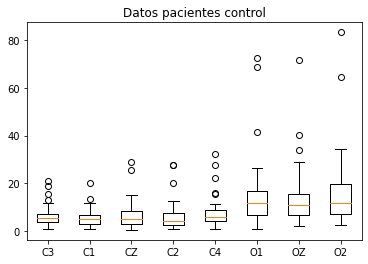

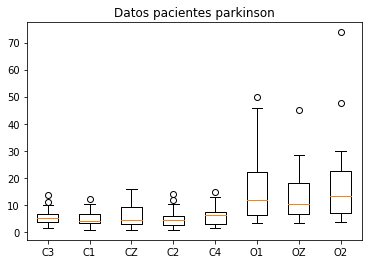

In [ ]:
df_head = df.iloc[:37, :]
df_tail = df.iloc[37:, :]

# guardar los nuevos dataframes en archivos separados
df_head.to_csv('mi_archivo_head.csv', index=False)
df_tail.to_csv('mi_archivo_tail.csv', index=False)

# leer los nuevos dataframes
df_head = pd.read_csv('mi_archivo_head.csv')
df_tail = pd.read_csv('mi_archivo_tail.csv')

# graficar los resultados utilizando boxplot
plt.boxplot(df_head.iloc[:, 1:].values, labels=df_head.columns[1:])
plt.title("Datos pacientes control")
plt.show()

plt.boxplot(df_tail.iloc[:, 1:].values, labels=df_tail.columns[1:])
plt.title("Datos pacientes parkinson")
plt.show()


Planteamiento de las hipótesis nulas y alternativas, donde se aplica la prueba paramétrica t.

Se procede a determinar si existe diferencia estadística entre canales de cada grupo de sujetos mediante una prueba t.

Para esto primero se comprueban los supuestos necesarios que son:
- Normalidad de la variable.
- Independencia.
- Homocedasticidad.

Para la independencia se asume que los grupos son independientes.
Para comprobar la normalidad de los datos realizamos la prueba normalidad a una muestra de los datos.

In [ ]:
def check_normality(data):
    '''Check if the distribution is normal.'''

    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data, plot=plt)
    plt.show()

    pVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['Omnibus']    = stats.normaltest(data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk']    = stats.shapiro(data)

    print('p-values for all {0} data points: ----------------'.format(len(data)))
    print(pVals)
    print('p-values for the first 100 data points: ----------------')

    if pVals['Omnibus'] > 0.05:
        print('Data are normally distributed')
    elif pVals['Shapiro-Wilk'] > 0.05:
        print('Data are normally distributed')
    else:
        print("Data arent normally distribuited")
    # --- >>> STOP stats <<< ---

    return pVals['Shapiro-Wilk']

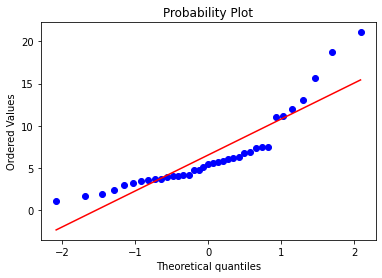

<ipython-input-11-21755266b736>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 37 data points: ----------------
Omnibus         0.000062
Shapiro-Wilk    0.000033
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


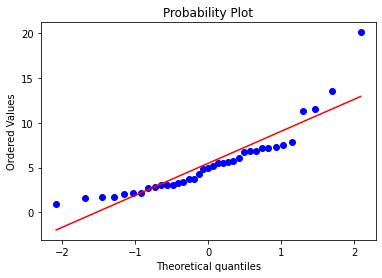

p-values for all 37 data points: ----------------
Omnibus         0.000002
Shapiro-Wilk    0.000064
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


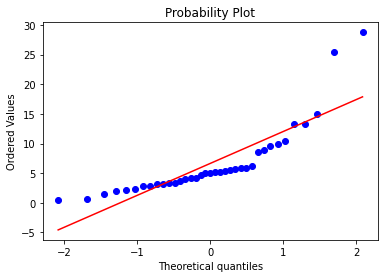

p-values for all 37 data points: ----------------
Omnibus         1.361645e-07
Shapiro-Wilk    1.281838e-06
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


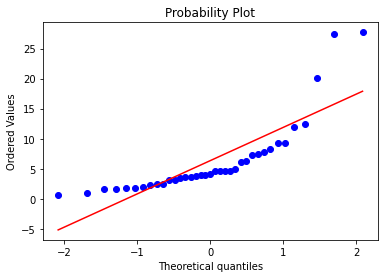

p-values for all 37 data points: ----------------
Omnibus         1.461716e-07
Shapiro-Wilk    2.566595e-07
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


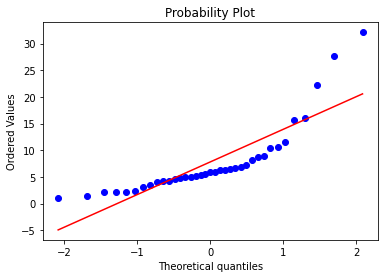

p-values for all 37 data points: ----------------
Omnibus         5.558021e-07
Shapiro-Wilk    1.215304e-06
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


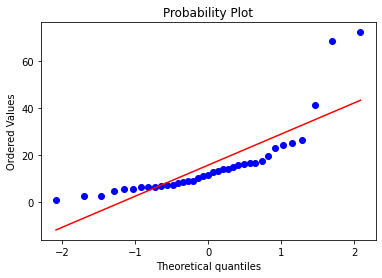

p-values for all 37 data points: ----------------
Omnibus         9.027622e-09
Shapiro-Wilk    1.674594e-07
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


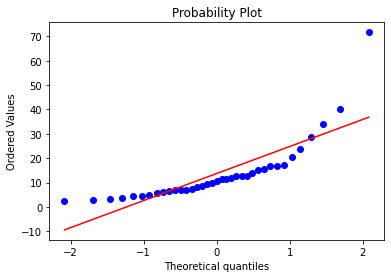

p-values for all 37 data points: ----------------
Omnibus         2.344028e-10
Shapiro-Wilk    2.246461e-07
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


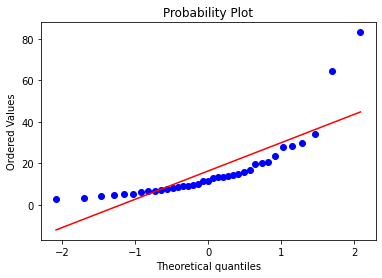

p-values for all 37 data points: ----------------
Omnibus         9.715499e-10
Shapiro-Wilk    1.167901e-07
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


In [ ]:
Nombres_canales.pop(0);
for i in Nombres_canales:
  c=df.loc[0:37,i]
  x=check_normality(c)

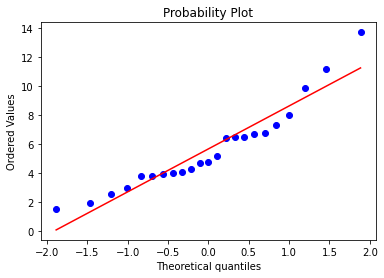

p-values for all 23 data points: ----------------
Omnibus         0.031592
Shapiro-Wilk    0.057331
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


<ipython-input-11-21755266b736>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


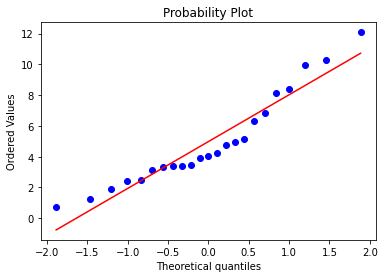

p-values for all 23 data points: ----------------
Omnibus         0.170836
Shapiro-Wilk    0.066985
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


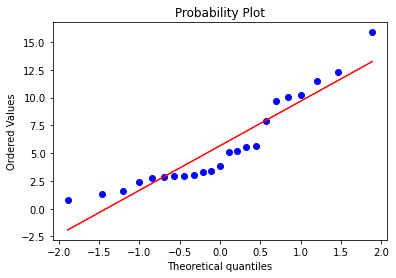

p-values for all 23 data points: ----------------
Omnibus         0.110459
Shapiro-Wilk    0.010167
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


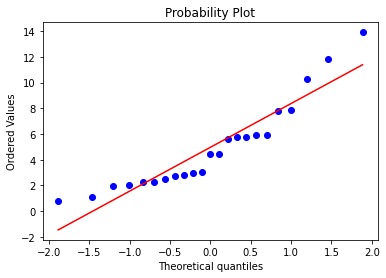

p-values for all 23 data points: ----------------
Omnibus         0.036557
Shapiro-Wilk    0.012395
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


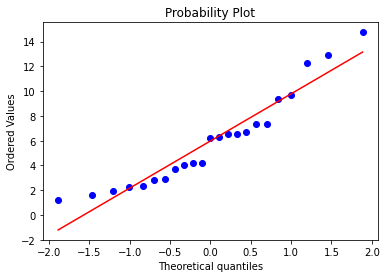

p-values for all 23 data points: ----------------
Omnibus         0.199802
Shapiro-Wilk    0.053604
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


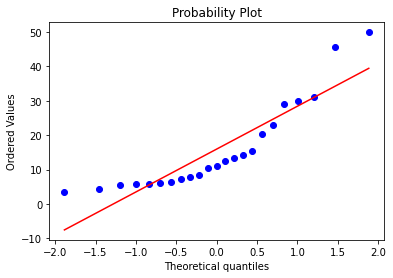

p-values for all 23 data points: ----------------
Omnibus         0.009927
Shapiro-Wilk    0.000789
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


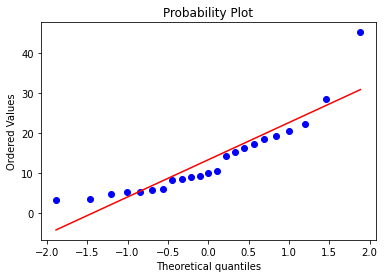

p-values for all 23 data points: ----------------
Omnibus         0.000196
Shapiro-Wilk    0.001890
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


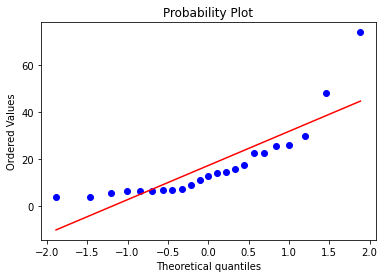

p-values for all 23 data points: ----------------
Omnibus         0.000004
Shapiro-Wilk    0.000050
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


In [ ]:
for i in Nombres_canales: #Se aplica la prueba de normalidad a cada canal de los pacientes parkinson
    c=df.loc[37:60,i]
    x=check_normality(c)

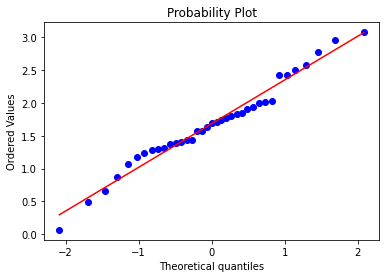

p-values for all 37 data points: ----------------
Omnibus         0.746093
Shapiro-Wilk    0.695920
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


<ipython-input-11-21755266b736>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


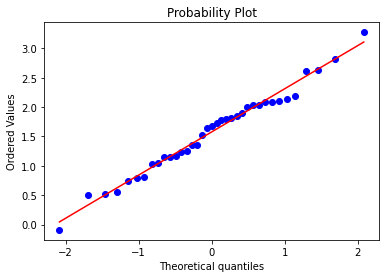

p-values for all 37 data points: ----------------
Omnibus         0.961730
Shapiro-Wilk    0.932194
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


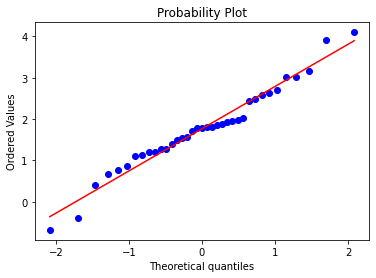

p-values for all 37 data points: ----------------
Omnibus         0.508023
Shapiro-Wilk    0.505375
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


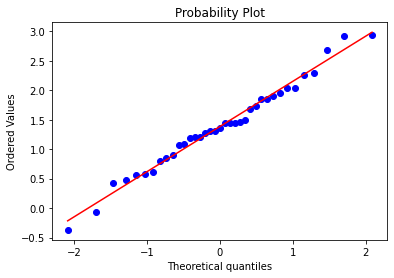

p-values for all 37 data points: ----------------
Omnibus         0.890794
Shapiro-Wilk    0.875255
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


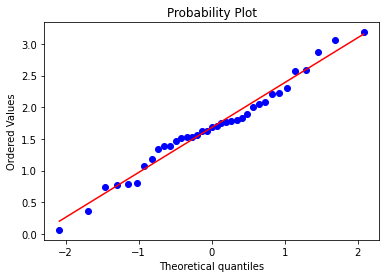

p-values for all 37 data points: ----------------
Omnibus         0.820728
Shapiro-Wilk    0.722256
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


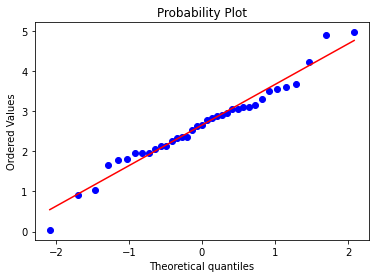

p-values for all 37 data points: ----------------
Omnibus         0.397002
Shapiro-Wilk    0.519474
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


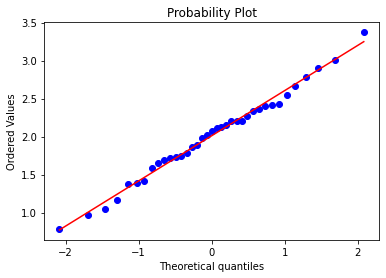

p-values for all 37 data points: ----------------
Omnibus         0.967346
Shapiro-Wilk    0.992012
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


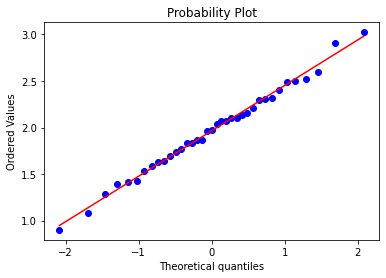

p-values for all 37 data points: ----------------
Omnibus         0.969322
Shapiro-Wilk    0.999323
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


In [ ]:
from scipy.stats import boxcox
from scipy.stats import normaltest
for i in Nombres_canales:
    c=df.loc[0:37,i]
    c, lambda_ = boxcox(c)
    x=check_normality(c)
    print('---------')
    stat, p = normaltest(c)
    if p > 0.05:
        print('Los datos transformados siguen una distribución normal')
    else:
        print('Los datos transformados no siguen una distribución normal')

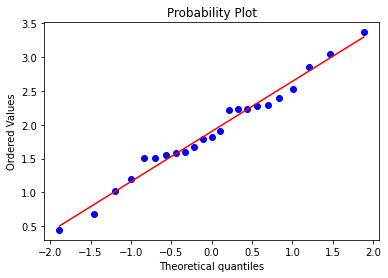

p-values for all 23 data points: ----------------
Omnibus         0.969248
Shapiro-Wilk    0.940482
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


<ipython-input-11-21755266b736>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


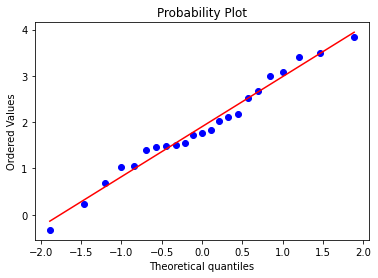

p-values for all 23 data points: ----------------
Omnibus         0.996801
Shapiro-Wilk    0.904380
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


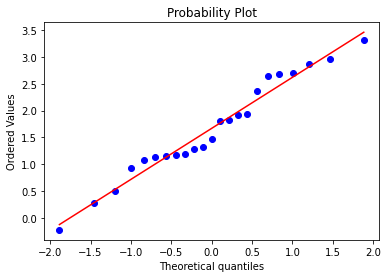

p-values for all 23 data points: ----------------
Omnibus         0.862117
Shapiro-Wilk    0.624535
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


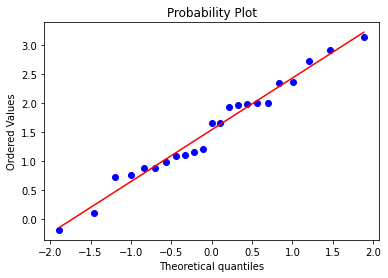

p-values for all 23 data points: ----------------
Omnibus         0.935134
Shapiro-Wilk    0.802098
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


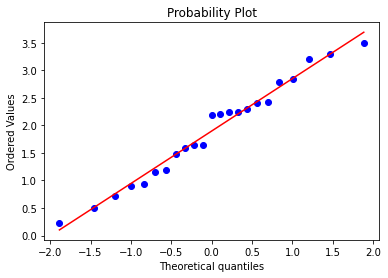

p-values for all 23 data points: ----------------
Omnibus         0.569737
Shapiro-Wilk    0.708415
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


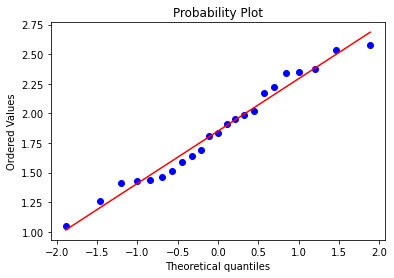

p-values for all 23 data points: ----------------
Omnibus         0.459260
Shapiro-Wilk    0.643464
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


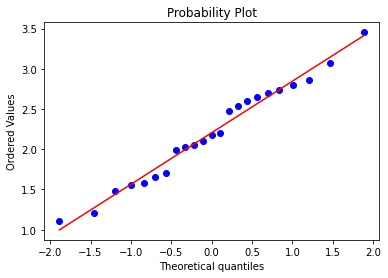

p-values for all 23 data points: ----------------
Omnibus         0.770779
Shapiro-Wilk    0.845862
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


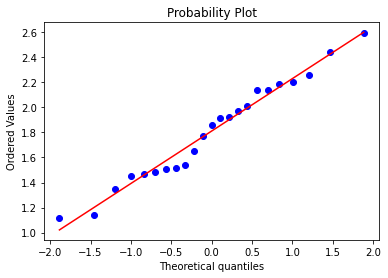

p-values for all 23 data points: ----------------
Omnibus         0.627709
Shapiro-Wilk    0.660435
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed
---------
Los datos transformados siguen una distribución normal


In [ ]:
for i in Nombres_canales:
    c=df.loc[37:60,i]
    c, lambda_ = boxcox(c)
    x=check_normality(c)
    print('---------')
    stat, p = normaltest(c)
    if p > 0.05:
        print('Los datos transformados siguen una distribución normal')
    else:
        print('Los datos transformados no siguen una distribución normal')

Se realiza la prueba de homocedasticidad de Levene.

In [ ]:
from scipy.stats import levene
# Se captura un dataframe con los datos de los primeros 36 (pacientes control) y el restante en otro dataframe
df_head = df.iloc[:37, 1:]
df_tail = df.iloc[37:, 1:]
# Se recorreo las columnas del dataframe
for col_name in df_head.columns:
    # Se realiza la prueba de levene con el que se comprueba su homocedasticidad
    _, p_value = levene(df_head[col_name], df_tail[col_name], center='median')
    print(f"Column {col_name}: p-value = {p_value}")
    if p > 0.05:
      print('Los datos transformados cumplen la prueba de homocedasticidad de levene')
    else:
      print('Los datos transformados cumplen la prueba de homocedasticidad de levene')

Column C3: p-value = 0.3756328866720807
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column C1: p-value = 0.648349083935998
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column CZ: p-value = 0.7271195304928226
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column C2: p-value = 0.38994178569795346
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column C4: p-value = 0.4033366473121691
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column O1: p-value = 0.8809741269832035
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column OZ: p-value = 0.8335969319580089
Los datos transformados cumplen la prueba de homocedasticidad de levene
Column O2: p-value = 0.7475116580986725
Los datos transformados cumplen la prueba de homocedasticidad de levene


Se realiza la prueba t.

Column C3: p-value = 0.4681231114401604


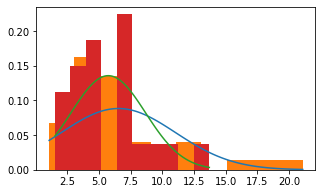

Se rechaza hipotesis alternativa
Column C1: p-value = 0.6487597783284362


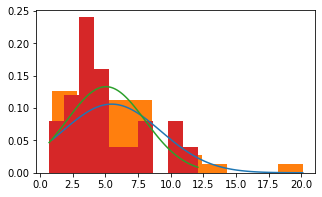

Se rechaza hipotesis alternativa
Column CZ: p-value = 0.550077531575901


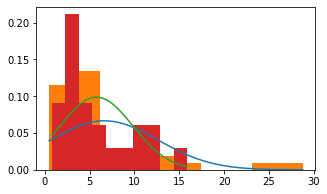

Se rechaza hipotesis alternativa
Column C2: p-value = 0.39493620854578004


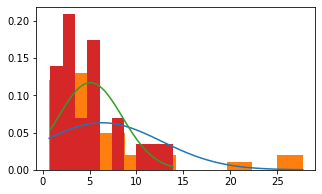

Se rechaza hipotesis alternativa
Column C4: p-value = 0.27918154564126924


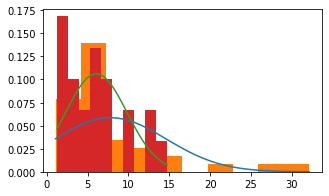

Se rechaza hipotesis alternativa
Column O1: p-value = 0.8898803018081768


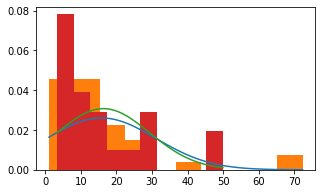

Se rechaza hipotesis alternativa
Column OZ: p-value = 0.9918116206739092


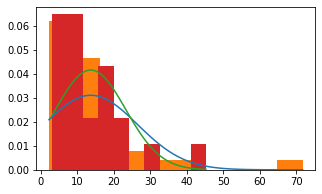

Se rechaza hipotesis alternativa
Column O2: p-value = 0.7714997761914785


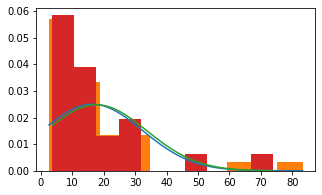

Se rechaza hipotesis alternativa


In [ ]:
from scipy.stats import ttest_ind

df_head = df.iloc[:37, 1:]
df_tail = df.iloc[37:, 1:]
# Realizar la prueba t para los conjuntos de datos de los pacientes control y los de parkinson por cada canal
for col_name in df_head.columns:

    t_statistic, p_value = ttest_ind(df_head[col_name], df_tail[col_name])
    print(f"Column {col_name}: p-value = {p_value}")
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 3));

    if p > 0.05:
      media=np.mean(df_head[col_name]);
      desviacion_estandar=np.std(df_head[col_name]);
      media1=np.mean(df_tail[col_name]);
      desviacion_estandar1=np.std(df_tail[col_name]);
      from scipy.stats import norm


      x=np.linspace(df_head[col_name].min(), df_head[col_name].max(), 100);
      pdf= norm.pdf(x, media, desviacion_estandar);
      plt.plot(x, pdf);
      plt.hist(df_head[col_name], density=True, alpha=1);
      x1=np.linspace(df_tail[col_name].min(), df_tail[col_name].max(), 100);
      pdf1= norm.pdf(x1, media1, desviacion_estandar1);
      plt.plot(x1, pdf1);
      plt.hist(df_tail[col_name], density=True, alpha=1);
      plt.show();
      print('Se rechaza hipotesis alternativa')
    else:
      print('No se rechaza la hipotesis alternativa')
# Realizar la prueba t para los conjuntos de datos data1 y data2
